# Configure font

In [1]:
# Configure Arial as the default font in all figures

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


arial_font_path = '/PATH/TO/ARIAL/FONT/arial.ttf'

fm.fontManager.addfont(arial_font_path)

plt.rcParams['font.family'] = 'Arial'

# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure S23

## Panel A

In [3]:
import pandas as pd

bindingvars = pd.read_csv(path+"Fig7/FYN_bPCA_fitness_replicates.txt",
                         sep='\t', lineterminator='\n', low_memory=False)

bindingvars = bindingvars.sort_values('fitness', ascending=False)

FYN_core_seq = 'FLFFIIV'
FYN_core_pos = [2,16,18,24,26,48,53]
bindingvars["core"] = pd.Series(dtype="object")
for index, row in bindingvars.iterrows():
    core=[]
    for i in FYN_core_pos:
        core.append(row.aa_seq[i])
    bindingvars.at[index,'core'] = ''.join(core)
    
    if core == FYN_core_seq:
        bindingvars.at[index, 'Nham_aa'] = 0
    else:
        bindingvars.at[index, 'Nham_aa'] = sum(1 for a,b in zip(FYN_core_seq, core) if a!=b)

bindingvars

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate3,growthrate3_sigma,growthrate,growthrate_sigma,core
21034,NaN,TLMVALYDYEARTEDDLSLHKGEKFQILNSSEGDWWEARSLTTGET...,NaN,2,NaN,NaN,False,False,False,178,...,0.038010,0.208139,0.003512,0.215109,0.006757,0.224259,0.011738,0.214630,0.003153,MLLFIIV
20463,NaN,TLMVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGET...,NaN,3,NaN,NaN,False,False,False,276,...,0.032730,0.208687,0.003046,0.210929,0.005537,0.221097,0.010578,0.214087,0.002715,MLFFIVL
20459,NaN,TLMVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGET...,NaN,3,NaN,NaN,False,False,False,194,...,0.036294,0.209165,0.003409,0.206391,0.006001,0.217822,0.011587,0.213067,0.003011,MLFFIVI
8000,NaN,TLIVALYDYEARTEDDLSFHKGEKFQVLNSSEGDWWEARSLTTGET...,NaN,2,NaN,NaN,False,False,False,132,...,0.040456,0.208705,0.003915,0.204053,0.006508,0.219284,0.011550,0.211803,0.003356,ILFFVIV
20558,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,2,NaN,NaN,False,False,False,222,...,0.034647,0.207458,0.003261,0.205464,0.005780,0.219571,0.010728,0.211672,0.002874,MLFLIIV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,NaN,TLIVALYDYEARTEDDMSMHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6,NaN,NaN,False,False,False,62,...,0.423567,-0.055777,0.048741,-0.040584,0.044214,NaN,NaN,-0.059852,0.035138,IMMMMFV
4017,NaN,TLIVALYDYEARTEDDVSLHKGEKIQLLNSSEGDWWEARSLTTGET...,NaN,7,NaN,NaN,False,False,False,48,...,0.422266,-0.047600,0.048813,-0.048727,0.043916,NaN,NaN,-0.060711,0.035030,IVLILMI
4428,NaN,TLIVALYDYEARTEDDVSIHKGEKMQVLNSSEGDWWEARSLTTGET...,NaN,7,NaN,NaN,False,False,False,51,...,0.565321,NaN,NaN,-0.051772,0.043823,NaN,NaN,-0.064032,0.046898,IVIMVMF
42681,NaN,TLLVALYDYEARTEDDFSVHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7,NaN,NaN,False,False,False,110,...,0.350424,-0.051950,0.034515,-0.059477,0.043622,NaN,NaN,-0.068015,0.029070,LFVVLMI


In [4]:
from seaborn import kdeplot
import numpy as np
import matplotlib.pyplot as plt

bindingvars_scaled = bindingvars.copy()

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

def normalize_errors(values, bounds):
    return [x * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

arbitraryWT='FLFFVIV'

fig, ax = plt.subplots()

my_kde = kdeplot(data=bindingvars, x='fitness', ax=ax)

lines = my_kde.get_lines()
plt.close()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
    ax.axvline(x[np.argmax(y)], ls='--')

bindingvars_scaled['fitness']=normalize(list(bindingvars_scaled['fitness']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
bindingvars_scaled['sigma']=normalize_errors(list(bindingvars_scaled['sigma']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
bindingvars_scaled['fitness1_uncorr']=normalize(list(bindingvars_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
bindingvars_scaled['sigma1_uncorr']=normalize_errors(list(bindingvars_scaled['sigma1_uncorr']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
bindingvars_scaled['fitness2_uncorr']=normalize(list(bindingvars_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
bindingvars_scaled['sigma2_uncorr']=normalize_errors(list(bindingvars_scaled['sigma2_uncorr']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
bindingvars_scaled['fitness3_uncorr']=normalize(list(bindingvars_scaled['fitness3_uncorr']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness3_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
bindingvars_scaled['sigma3_uncorr']=normalize_errors(list(bindingvars_scaled['sigma3_uncorr']),{'actual': {'lower': mode, 'upper': bindingvars_scaled.loc[bindingvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})

fig, ax = plt.subplots()

my_kde = kdeplot(data=bindingvars_scaled, x='fitness', ax=ax)

lines = my_kde.get_lines()

for line in lines:
    x, y = line.get_data()

plt.close()

In [5]:
# Load data

import pandas as pd
from Bio.Seq import Seq

stabilityvars = pd.read_csv(path+"Fig2/Sparse_DTS_Cores_fitness_replicates.txt",
                         sep='\t', lineterminator='\n', low_memory=False)

stabilityvars = stabilityvars.sort_values('fitness', ascending = False)

# De-multiplex each protein's variants

ID_dict =  {'MT' : 'P0A9X9',
           'KT' : 'P01053',
           'TL' : 'P06241'}
stabilityvars["Protein"] = pd.Series(dtype="object")
for index, row in stabilityvars.iterrows():
    try:
        stabilityvars.at[index,'Protein']=ID_dict[row.aa_seq[:2]]
    except KeyError:
        continue

stabilityvars = stabilityvars.loc[stabilityvars['Protein']=='P06241'].copy()

# Find core sequences

cores = {'P06241' : [2,16,18,24,26,48,53]}
stabilityvars["core"] = pd.Series(dtype="object")
for index, row in stabilityvars.iterrows():
    core=[]
    for i in cores[row.Protein]:
        core.append(row.aa_seq[i])
    stabilityvars.at[index,'core'] = ''.join(core)

# Define WT cores

proteins = {'P06241': 'FYN-SH3'}

P06241 = 'ACGCTTTTCGTTGCATTGTATGATTATGAAGCAAGAACTGAAGATGATTTGTCTTTCCATAAAGGTGAAAAATTCCAAATCTTGAATTCTTCTGAAGGTGATTGGTGGGAAGCAAGATCTTTGACTACTGGTGAAACTGGTTATATCCCATCTAACTATGTCGCGCCTGTG'

prots=[P06241]

wt_cores = {}
for (prot_seq, prot_nam) in zip(prots, proteins.keys()):
    aa_seq=str(Seq(prot_seq).translate())
    wt_core=[]
    for i in cores[prot_nam]:
        wt_core.append(aa_seq[i])
    wt_cores[prot_nam]= ''.join(wt_core)

# Find Hamming distance to WT
stabilityvars["wt_core"] = pd.Series(dtype="object")
for index, row in stabilityvars.iterrows():
    wt = wt_cores[row.Protein]
    stabilityvars.at[index, 'wt_core']=wt
    if row.core == wt:
        stabilityvars.at[index, 'Nham_aa'] = 0
    else:
        stabilityvars.at[index, 'Nham_aa'] = sum(1 for a,b in zip(wt, row.core) if a!=b)

stabilityvars

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate,growthrate_sigma,Protein,core,wt_core
9873,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,50,...,0.141862,0.239689,0.030180,0.226946,0.009375,0.232834,0.009311,P06241,MLLLVVL,FLFFIIV
9771,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,36,...,0.156208,0.220078,0.035262,0.221325,0.010256,0.225696,0.010252,P06241,MLFLIVI,FLFFIIV
8439,NaN,TLMVALYDYEARTEDDMSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,5.0,NaN,NaN,True,False,False,224,...,0.121382,0.221958,0.015723,0.211651,0.008968,0.217223,0.007966,P06241,MMFLIVF,FLFFIIV
13622,NaN,TLFVALYDYEARTEDDMSLHKGEKIQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,64,...,0.150420,0.186441,0.026924,0.215573,0.010191,0.215302,0.009872,P06241,FMLIVVL,FLFFIIV
9382,NaN,TLMVALYDYEARTEDDFSFHKGEKFQVLNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,67,...,0.138986,0.211585,0.026351,0.206176,0.009328,0.210479,0.009122,P06241,MFFFVIL,FLFFIIV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,NaN,TLVVALYDYEARTEDDISLHKGEKIQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,57,...,0.688682,NaN,NaN,-0.060774,0.043048,-0.069658,0.045199,P06241,VILILLL,FLFFIIV
10635,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,141,...,0.417133,-0.080343,0.053032,-0.061804,0.031054,-0.069925,0.027377,P06241,VVFMMML,FLFFIIV
6480,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,92,...,0.518747,-0.066789,0.054532,-0.072341,0.043004,-0.070280,0.034046,P06241,IIIVLVL,FLFFIIV
14007,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,73,...,0.688254,NaN,NaN,-0.067366,0.043021,-0.076579,0.045171,P06241,FVVLFMM,FLFFIIV


In [6]:
from seaborn import kdeplot
import numpy as np
import matplotlib.pyplot as plt

stabilityvars_scaled = stabilityvars.copy()

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

def normalize_errors(values, bounds):
    return [x * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

arbitraryWT='FLFFVIV'

fig, ax = plt.subplots()

my_kde = kdeplot(data=stabilityvars, x='fitness', ax=ax)

lines = my_kde.get_lines()
plt.close()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
    ax.axvline(x[np.argmax(y)], ls='--')

stabilityvars_scaled['fitness']=normalize(list(stabilityvars_scaled['fitness']),{'actual': {'lower': mode, 'upper': stabilityvars_scaled.loc[stabilityvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
stabilityvars_scaled['sigma']=normalize_errors(list(stabilityvars_scaled['sigma']),{'actual': {'lower': mode, 'upper': stabilityvars_scaled.loc[stabilityvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
stabilityvars_scaled['fitness1_uncorr']=normalize(list(stabilityvars_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': stabilityvars_scaled.loc[stabilityvars_scaled['core']==arbitraryWT]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
stabilityvars_scaled['sigma1_uncorr']=normalize_errors(list(stabilityvars_scaled['sigma1_uncorr']),{'actual': {'lower': mode, 'upper': stabilityvars_scaled.loc[stabilityvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
stabilityvars_scaled['fitness2_uncorr']=normalize(list(stabilityvars_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': stabilityvars_scaled.loc[stabilityvars_scaled['core']==arbitraryWT]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
stabilityvars_scaled['sigma2_uncorr']=normalize_errors(list(stabilityvars_scaled['sigma2_uncorr']),{'actual': {'lower': mode, 'upper': stabilityvars_scaled.loc[stabilityvars_scaled['core']==arbitraryWT]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})

fig, ax = plt.subplots()

my_kde = kdeplot(data=stabilityvars_scaled, x='fitness', ax=ax)

lines = my_kde.get_lines()

for line in lines:
    x, y = line.get_data()

plt.close()

In [7]:
bindingvars_scaled = bindingvars_scaled.rename(columns={'fitness': 'binding_fitness'})
stabilityvars_scaled = stabilityvars_scaled.rename(columns={'fitness': 'stability_fitness'})
stability_vs_binding_scaled = bindingvars_scaled.merge(stabilityvars_scaled, left_on='aa_seq', right_on='aa_seq')

In [8]:
import pandas as pd
from os import listdir
from os.path import isfile, join

columns = ['Query','Target','E-value','SeqId','QueryStart', 'QueryEnd','QueryLen', 'TargetStart',
          'TargetEnd','TargetLen', 'Align_len', 'Score', 'QuerySeq', 'TargetSeq', 'mismatch',
           'QueryCov','TargetCov', 'taxid','taxname','taxlineage','lddt','alntmscore','rmsd','prob']

isofolds=pd.read_csv(path+'Fig4/fyn_aln1_AFUniprot',names=columns,sep='\t')

reliable_isofolds = isofolds.loc[isofolds['alntmscore']>0.6].loc[isofolds['prob']==1].loc[isofolds['QueryStart']<3].loc[isofolds['QueryEnd']>53].loc[isofolds['rmsd']<2].drop_duplicates('TargetSeq').copy()

In [9]:
#transplantable core finding

DTS=['F','L','I','M','V']

wt=reliable_isofolds.iloc[0]['QuerySeq']
mut_pos = [2,16,18,24,26,48,53]
wtcore=''.join([reliable_isofolds.iloc[0]['QuerySeq'][i] for i in mut_pos])

aatype_pos=[]
for i in mut_pos:
    aatyperange=0
    for res in wt[:i]:
        if res == wt[i-1]:
            aatyperange+=1
    aatype_pos.append(aatyperange)
reliable_isofolds['MutPosinlib']='a'
reliable_isofolds["WTcore"] = pd.Series(dtype="object") 
reliable_isofolds["MutCore"] = pd.Series(dtype="object") 
reliable_isofolds["TransplantableAAs"] = pd.Series(dtype="object") 
reliable_isofolds["allDTS"] = pd.Series(dtype="object") 
reliable_isofolds["coreDels"] = pd.Series(dtype="object") 
reliable_isofolds["MutPosTested"] = pd.Series(dtype="object") 
totalerrors=0
for index, row in reliable_isofolds.iterrows():
    query=row.QuerySeq
    target=row.TargetSeq
    target_mut_pos=[]
    query_hyphens=[]
    iterator=0
    for i in query:
        if i=='-':
            query_hyphens.append(iterator)
        iterator+=1
    aligned_target=list(target)
    iterator=0
    for i in query_hyphens:
        del(aligned_target[i+iterator])
        iterator-=1
    aligned_target=''.join(aligned_target)
    mut_pos_test = [x+1 - row.QueryStart for x in mut_pos]
    mut_pos_test = [i - row.QueryStart +1 for i in mut_pos if i >= row.QueryStart-1 and i <= row.QueryEnd-1]
    mut=[]
    for pos in mut_pos_test:
        try:
            mut.append(aligned_target[pos])
        except IndexError:
            totalerrors+=1
    if ''.join(mut) == wtcore:
        reliable_isofolds.at[index,'WTcore']=True
        reliable_isofolds.at[index,'Nham']=0
    else:
        reliable_isofolds.at[index,'WTcore']=False
        nham=0
        for mutres, wtres in zip(mut,wtcore):
            if mutres != wtres:
                nham+=1
        reliable_isofolds.at[index,'Nham']=nham
        
    reliable_isofolds.at[index,'MutCore']=('').join(mut)
    allDTS=True
    coreDels=False
    mutations_in_lib = []
    transplantable_aas = []
    for pos, res in zip([idx for idx, pos in enumerate(mut_pos) if pos >= row.QueryStart-1 and pos <= row.QueryEnd-1], mut):
        if res not in DTS:
            allDTS=False
        else:
            mutations_in_lib.append(mut_pos[pos])
            transplantable_aas.append(res)
        if res == '-':
            coreDels=True
    reliable_isofolds.at[index,'MutPosinlib']=str(mutations_in_lib)
    reliable_isofolds.at[index,'TransplantableAAs']=''.join(transplantable_aas)
    reliable_isofolds.at[index,'allDTS']=allDTS
    reliable_isofolds.at[index,'coreDels']=coreDels 
    reliable_isofolds.at[index,'MutPosTested']=str([i for i in mut_pos if i >= row.QueryStart-1 and i <= row.QueryEnd-1])


In [10]:
import ast
fyn_wt = 'TLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGETGYIPSNYVAPV'

def integrate_variant_with_positions(wildtype_seq, variant_seq, mut_positions):
    mut_positions = ast.literal_eval(mut_positions)
    fyn_variant = list(wildtype_seq)

    for i, pos in enumerate(mut_positions):
        if i < len(variant_seq): 
            fyn_variant[pos] = variant_seq[i]
    
    return ''.join(fyn_variant)

def calculate_differences(variant, wildtype):
    return sum(1 for a, b in zip(variant, wildtype) if a != b)

real_variants = pd.DataFrame()

reliable_isofolds['muts_in_fyn_seq'] = reliable_isofolds.apply(
    lambda row: integrate_variant_with_positions(fyn_wt, row['TransplantableAAs'], row['MutPosinlib']),
    axis=1
)

reliable_isofolds['muts_in_fyn_seq_Nham_aa'] = reliable_isofolds['muts_in_fyn_seq'].apply(lambda variant: calculate_differences(variant, fyn_wt))

reliable_isofolds["core"] = pd.Series(dtype="object") 
for index, row in reliable_isofolds.iterrows():
    reliable_isofolds.at[index,'core']=''.join(row.muts_in_fyn_seq[i] for i in mut_pos)

In [11]:
cores_in_homologs = list(reliable_isofolds.drop_duplicates('core',keep='first')['core'].unique())
stability_vs_binding_scaled["in_homolog_set"] = pd.Series(dtype="object") 
for index, row in stability_vs_binding_scaled.iterrows():
    if row.core_x in cores_in_homologs:
        stability_vs_binding_scaled.at[index,'in_homolog_set']=True
    else:
        stability_vs_binding_scaled.at[index,'in_homolog_set']=False
stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]

,nt_seq_x,aa_seq,Nham_nt_x,Nham_aa_x,Nmut_codons_x,WT_x,indel_x,STOP_x,STOP_readthrough_x,count_e1_s0_x,...,growthrate1_y,growthrate1_sigma_y,growthrate2_y,growthrate2_sigma_y,growthrate_y,growthrate_sigma_y,Protein,core_y,wt_core,in_homolog_set
0,NaN,TLMVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGET...,NaN,3,NaN,NaN,False,False,False,276,...,0.209659,0.011529,0.207074,0.008805,0.209946,0.007066,P06241,MLFFIVL,FLFFIIV,True
2,NaN,TLIVALYDYEARTEDDLSFHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,3,NaN,NaN,False,False,False,235,...,0.178839,0.015134,0.166919,0.009014,0.172117,0.007906,P06241,ILFLVIV,FLFFIIV,True
3,NaN,TLVVALYDYEARTEDDLSFHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,3,NaN,NaN,False,False,False,532,...,0.165554,0.032451,0.159818,0.009743,0.162330,0.009709,P06241,VLFLVIV,FLFFIIV,True
4,NaN,TLVVALYDYEARTEDDLSLHKGEKFQVLNSSEGDWWEARSLTTGET...,NaN,3,NaN,NaN,False,False,False,393,...,0.156634,0.028216,0.153205,0.009868,0.155304,0.009665,P06241,VLLFVIV,FLFFIIV,True
6,NaN,TLFVALYDYEARTEDDLSFHKGEKFQVLNSSEGDWWEARSLTTGET...,NaN,1,NaN,True,False,False,False,123,...,0.194397,0.013911,0.190664,0.008888,0.193947,0.007624,P06241,FLFFVIV,FLFFIIV,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8254,NaN,TLVVALYDYEARTEDDLSVHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,6,NaN,NaN,False,False,False,1040,...,-0.022976,0.025894,0.007970,0.013890,-0.001630,0.012546,P06241,VLVVLLF,FLFFIIV,True
8293,NaN,TLVVALYDYEARTEDDFSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6,NaN,NaN,False,False,False,629,...,0.004466,0.042008,-0.011462,0.023058,-0.009680,0.020702,P06241,VFLLVFV,FLFFIIV,True
8358,NaN,TLIVALYDYEARTEDDLSVHKGEKIQVLNSSEGDWWEARSLTTGET...,NaN,5,NaN,NaN,False,False,False,295,...,-0.028016,0.023662,-0.010687,0.014361,-0.017433,0.012524,P06241,ILVIVFV,FLFFIIV,True
8390,NaN,TLVVALYDYEARTEDDVSLHKGEKVQILNSSEGDWWEARSLTTGET...,NaN,5,NaN,NaN,False,False,False,804,...,-0.042458,0.030322,-0.024288,0.019405,-0.031556,0.016637,P06241,VVLVIFV,FLFFIIV,True


/tmp/15462475/ipykernel_1726195/3002375610.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


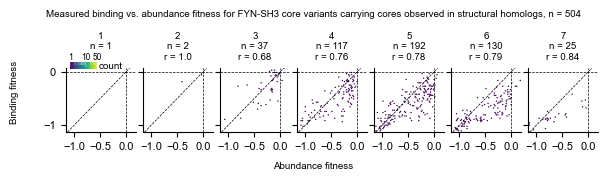

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math

plt.rcParams['font.family'] = 'Arial'

xlim=(min(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['stability_fitness']),max(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['stability_fitness']))
ylim=(min(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['binding_fitness']),max(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['binding_fitness']))

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(6,1.5))
coliterator=0
rowiterator=0
for hamm_dist in range(1,8,1):
    #stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True].loc[stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['Nham_aa_x']==hamm_dist].plot.scatter(y='stability_fitness', x='binding_fitness')
    
    y = stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True].loc[stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['Nham_aa_x']==hamm_dist][['binding_fitness']].to_numpy()
    x = stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True].loc[stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['Nham_aa_x']==hamm_dist][['stability_fitness']].to_numpy()
    
    if hamm_dist > 1:
        model = LinearRegression()
        model.fit(x,y)
        
        y_pred = model.predict(x)
        
        ax[coliterator].set_title(str(hamm_dist)+'\nn = '+str(len(x))+'\nr = '+str(round(pearsonr(x.ravel(),y.ravel())[0],2)), fontsize=7)
    else:
        ax[coliterator].set_title(str(hamm_dist)+'\nn = '+str(len(x))+'\n', fontsize=7)
    
    ax[coliterator].set(xlim=xlim,ylim=ylim)
    hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['stability_fitness']),max(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['stability_fitness']),min(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['binding_fitness']),max(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['binding_fitness'])])
    #ax[coliterator].set_title(str(hamm_dist)+'\nn = '+str(len(x))+'\nr = '+str(round(pearsonr(x.ravel(),y.ravel())[0],2)), fontsize=7)
    ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
    ax[coliterator].set_ylim(min(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['binding_fitness']),max(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['binding_fitness']))
    ax[coliterator].set_xlim(min(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['stability_fitness']),max(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True]['stability_fitness']))
    ax[coliterator].spines[['right','top']].set_visible(False)
    ax[coliterator].set_xticks([0,-0.5,-1])
    #ax[coliterator].set_xticklabels([0,-0.5,-1])
    ax[coliterator].tick_params(axis='x', labelsize=8)
    ax[coliterator].tick_params(axis='y', labelsize=8)
    ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].set_rasterization_zorder(0)
    if coliterator != 0:
        ax[coliterator].yaxis.set_ticklabels([])
    coliterator+=1
    
#fmt = '%1.f'
#cax=fig.add_axes([0.99,0.25,0.005,0.3])
#cb=fig.colorbar(hbin, shrink=0.7,format=fmt,cax=cax)
#cb.ax.set_title('Counts',fontsize=7)
##cb.set_label('counts', rotation=270, fontsize=7, labelpad=8)
#cb.set_ticks([1,5,10,50])
#cb.set_ticklabels([1,5,10,50], fontsize=6)

fmt = '%1.f'
cax=fig.add_axes([0.095,0.65,0.045,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,50])
cb.set_ticklabels([1, 10,50], fontsize=6, rotation=0)
ax1 = cb.ax
ax1.text(60,0.1,'count',rotation=0, fontsize=7)

fig.text(0.5, 1, 'Measured binding vs. abundance fitness for FYN-SH3 core variants carrying cores observed in structural homologs, n = '+str(len(stability_vs_binding_scaled[stability_vs_binding_scaled['in_homolog_set'] == True])), ha='center', fontsize=7)
fig.text(0.5, -0.015, 'Abundance fitness', ha='center', fontsize=7)
fig.text(-0.005, 0.5, 'Binding fitness', va='center', rotation='vertical', fontsize=7)
fig.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.show()

## Panel B

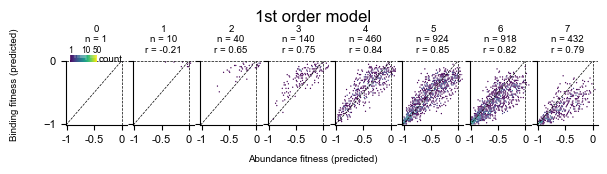

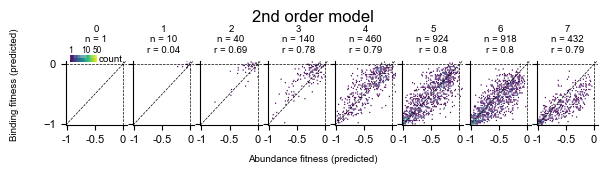

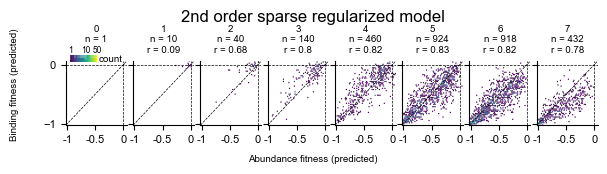

In [13]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math
from decimal import Decimal
from seaborn import kdeplot
import warnings
warnings.filterwarnings('ignore')

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

for model_name, task, model_name_print in zip(['1', '2', '2_sparseregularized'], ['1','1','4'], ['1st order model', '2nd order model', '2nd order sparse regularized model']):
    
    predicted_phenotypes_all_predictions = pd.read_csv(path+'Fig7/FYNbDTS_order'+model_name+'/task_'+task+'/predictions/predicted_phenotypes_supp.txt',
                                               sep='\t')
    
    predicted_abundance_all_predictions = predicted_phenotypes_all_predictions.loc[predicted_phenotypes_all_predictions['Abundance']==1]
    predicted_binding_all_predictions = predicted_phenotypes_all_predictions.loc[predicted_phenotypes_all_predictions['Binding']==1]
    predicted_abundance_all_predictions['mean'] = predicted_abundance_all_predictions[['fold_'+str(i) for i in range(1,11,1)]].mean(axis=1)
    predicted_abundance_all_predictions['std'] =  predicted_abundance_all_predictions[['fold_'+str(i) for i in range(1,11,1)]].std(axis=1)
    predicted_binding_all_predictions['mean'] = predicted_binding_all_predictions[['fold_'+str(i) for i in range(1,11,1)]].mean(axis=1)
    predicted_binding_all_predictions['std'] =  predicted_binding_all_predictions[['fold_'+str(i) for i in range(1,11,1)]].std(axis=1)

    FYN_core_pos = [2,16,18,24,26,48,53]
    FYN_core_seq = 'FLFFIIV'
    
    for index, row in predicted_binding_all_predictions.iterrows():
        core=[]
        for i in FYN_core_pos:
            core.append(row.aa_seq[i])
        predicted_binding_all_predictions.at[index,'core'] = ''.join(core)
        
        if core == FYN_core_seq:
            predicted_binding_all_predictions.at[index, 'Nham_aa'] = 0
        else:
            predicted_binding_all_predictions.at[index, 'Nham_aa'] = sum(1 for a,b in zip(FYN_core_seq, core) if a!=b)

    for index, row in predicted_abundance_all_predictions.iterrows():
        core=[]
        for i in FYN_core_pos:
            core.append(row.aa_seq[i])
        predicted_abundance_all_predictions.at[index,'core'] = ''.join(core)
        
        if core == FYN_core_seq:
            predicted_abundance_all_predictions.at[index, 'Nham_aa'] = 0
        else:
            predicted_abundance_all_predictions.at[index, 'Nham_aa'] = sum(1 for a,b in zip(FYN_core_seq, core) if a!=b)

    predicted_binding_scaled = predicted_binding_all_predictions.copy()
    norm_fig, norm_ax = plt.subplots()
    
    my_kde = kdeplot(data=predicted_binding_scaled, x='mean', ax=norm_ax)
    
    lines = my_kde.get_lines()
    plt.close()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
        norm_ax.axvline(x[np.argmax(y)], ls='--')
    
    predicted_binding_scaled['mean']=           normalize(list(predicted_binding_scaled['mean']),{'actual': {'lower': mode, 'upper': predicted_binding_scaled.loc[predicted_binding_scaled['WT']==True].iloc[0]['mean']}, 'desired': {'lower': -1, 'upper': 0}})

    if model_name == '2':
        predicted_binding_scaled_2ndordermodel = predicted_binding_scaled.copy()
    
    predicted_abundance_scaled = predicted_abundance_all_predictions.copy()
    norm_fig, norm_ax = plt.subplots()
    
    my_kde = kdeplot(data=predicted_abundance_scaled, x='mean', ax=norm_ax)
    
    lines = my_kde.get_lines()
    plt.close()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
        norm_ax.axvline(x[np.argmax(y)], ls='--')
    
    predicted_abundance_scaled['mean']=           normalize(list(predicted_abundance_scaled['mean']),{'actual': {'lower': mode, 'upper': predicted_abundance_scaled.loc[predicted_abundance_scaled['WT']==True].iloc[0]['mean']}, 'desired': {'lower': -1, 'upper': 0}})

    natural_DTS_cores_abundance = reliable_isofolds.merge(predicted_abundance_scaled[['core', 'mean']], on='core',how='left')
    natural_DTS_cores_binding   = reliable_isofolds.merge(predicted_binding_scaled[['core', 'mean']], on='core',how='left')

    xlim=(min(natural_DTS_cores_abundance.drop_duplicates('core', keep='first')['mean']),max(natural_DTS_cores_abundance.drop_duplicates('core', keep='first')['mean']))
    ylim=(min(natural_DTS_cores_binding.drop_duplicates('core', keep='first')['mean']),max(natural_DTS_cores_binding.drop_duplicates('core', keep='first')['mean']))
    
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(6,1.5))
    coliterator=0
    rowiterator=0
    for hamm_dist in range(0,8,1):
        y = natural_DTS_cores_binding.drop_duplicates('core', keep='first').loc[natural_DTS_cores_binding.drop_duplicates('core', keep='first')['Nham']==hamm_dist][['mean']].to_numpy()
        x = natural_DTS_cores_abundance.drop_duplicates('core', keep='first').loc[natural_DTS_cores_abundance.drop_duplicates('core', keep='first')['Nham']==hamm_dist][['mean']].to_numpy()
        
        if hamm_dist > 0:
            model = LinearRegression()
            model.fit(x,y)
            
            y_pred = model.predict(x)
            
            ax[coliterator].set_title(str(hamm_dist)+'\nn = '+str(len(x))+'\nr = '+str(round(pearsonr(x.ravel(),y.ravel())[0],2)), fontsize=7)
        else:
            ax[coliterator].set_title(str(hamm_dist)+'\nn = '+str(len(x))+'\n', fontsize=7)
                
        ax[coliterator].set(xlim=xlim,ylim=ylim)
        hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(natural_DTS_cores_abundance.drop_duplicates('core', keep='first')['mean']),max(natural_DTS_cores_abundance.drop_duplicates('core', keep='first')['mean']),min(natural_DTS_cores_binding.drop_duplicates('core', keep='first')['mean']),max(natural_DTS_cores_binding.drop_duplicates('core', keep='first')['mean'])])
        ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
        ax[coliterator].set_ylim(min(natural_DTS_cores_binding.drop_duplicates('core', keep='first')['mean']),max(natural_DTS_cores_binding.drop_duplicates('core', keep='first')['mean']))
        ax[coliterator].set_xlim(min(natural_DTS_cores_abundance.drop_duplicates('core', keep='first')['mean']),max(natural_DTS_cores_abundance.drop_duplicates('core', keep='first')['mean']))
        ax[coliterator].spines[['right','top']].set_visible(False)
        ax[coliterator].set_xticks([0,-0.5,-1])
        ax[coliterator].set_xticklabels([f'{int(tick)}' if tick.is_integer() else f'{tick}' for tick in ax[coliterator].get_xticks()])
        ax[coliterator].tick_params(axis='x', labelsize=8)
        ax[coliterator].tick_params(axis='y', labelsize=8)
        ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
        ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
        ax[coliterator].set_rasterization_zorder(0)
        if coliterator != 0:
            ax[coliterator].yaxis.set_ticklabels([])
        coliterator+=1
    
    fmt = '%1.f'
    cax=fig.add_axes([0.095,0.65,0.045,0.05])
    cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
    cb.outline.set_visible(False)
    cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
    cb.ax.xaxis.set_tick_params(pad=0)
    cb.set_ticks([1,10,50])
    cb.set_ticklabels([1,10,50], fontsize=6, rotation=0)
    ax1 = cb.ax
    ax1.text(60,0.1,'count',rotation=0, fontsize=7)
    fig.text(0.5, -0.015, 'Abundance fitness (predicted)', ha='center', fontsize=7)
    fig.text(-0.005, 0.5, 'Binding fitness (predicted)', va='center', rotation='vertical', fontsize=7)
    fig.tight_layout()
    fig.suptitle(model_name_print, y=1)
    plt.subplots_adjust(wspace=0.1)

## Panel C

In [14]:
import numpy as np
import matplotlib.colors as mcolors

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1, name=None):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
      name : Optional name for the colormap. If provided, the colormap
          will be registered under this name.

    Returns
    -------
      A `LinearSegmentedColormap` object.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # Regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # Shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mcolors.LinearSegmentedColormap(name if name else "shifted", cdict)

    return newcmap
iterator_cmap=100

In [15]:
from itertools import product

DTS = ['F','L','I','M','V']
a=list(product(DTS,repeat=7))

from tqdm import tqdm

dod={}
for variant in tqdm(a, total=len(a)):
    iterator=0
    positerator=0
    singles=[]
    for i in product(variant,DTS):
        mutant = ''.join(''.join(variant[:positerator])+str(i[1])+''.join(variant[positerator+1:]))
        if (iterator/5).is_integer() == True and iterator !=0:
            positerator+=1
        iterator+=1
        if mutant != ''.join(variant):
            singles.append(mutant)
    dod[''.join(variant)]=singles

100%|██████████| 78125/78125 [00:02<00:00, 38868.28it/s]


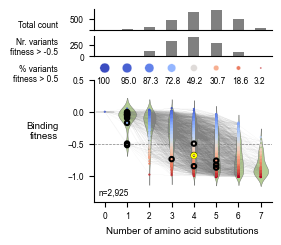

In [16]:
import seaborn as sns
import networkx as nx
from itertools import count
from seaborn import kdeplot
from itertools import groupby
import matplotlib
import numpy as np
import matplotlib.colors as mcolors

query_natural_DTS_cores = ['VLFIVFV', 'VLFIIFV', 'VLLIVFV', 'VLFILFV', 'VLLVVFV', 'VLFLVFV', 'VLIIVFV', 'FLLVVFV']
detrimental_singles = ['LLFFIIV', 'ILFFIIV', 'FVFFIIV', 'FLLFIIV', 'FLIFIIV', 'FLVFIIV', 'FLFMIIV', 'FLFVIIV', 'FLFFFIV', 'FLFFLIV', 'FLFFMIV', 'FLFFIFV', 'FLFFILV', 'FLFFIMV']

natural_core_predictions = reliable_isofolds.merge(predicted_binding_scaled_2ndordermodel[['core', 'mean']], on='core',how='left')
natural_core_predictions = natural_core_predictions.sort_values('mean',ascending=False).drop_duplicates('core',keep='first').copy()
natural_core_predictions = natural_core_predictions.rename(columns={'mean':'binding_fitness'})

lines = kdeplot(data=natural_core_predictions, x='binding_fitness').get_lines()
plt.close()
for line in lines:
    x, y = line.get_data()
    mode=x[np.argmax(y)]

G = nx.from_dict_of_lists(dod)
G_val = nx.from_dict_of_lists(dod)
G_grb2 = nx.from_dict_of_lists(dod)

pos={}
for index, row in natural_core_predictions.iterrows():
    pos[row.core] = (row.muts_in_fyn_seq_Nham_aa, row['binding_fitness'])
    
validated = query_natural_DTS_cores+detrimental_singles
pos_val={}
for index, row in natural_core_predictions[natural_core_predictions['core'].isin(validated)].iterrows():
    pos_val[row.core] = (row.muts_in_fyn_seq_Nham_aa, row.binding_fitness)
    
validated_grb2 = ['VLFIVFV']
pos_grb2={}
for index, row in natural_core_predictions[natural_core_predictions['core'].isin(validated_grb2)].iterrows():
    pos_grb2[row.core] = (row.muts_in_fyn_seq_Nham_aa, row.binding_fitness)
    
fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5))
plt.close()
fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5),sharex=ax1)


fig=sns.violinplot(x="muts_in_fyn_seq_Nham_aa", y="binding_fitness", data=natural_core_predictions, inner=None, ax=ax2, color='#B4D689', linewidth=0.3)
plt.axhline(y=-0.5, linestyle='--', color='gray', linewidth=0.5)

remove=[i for i in dod.keys() if i not in pos.keys()]
remove_val=[i for i in dod.keys() if i not in pos_val.keys()]
remove_grb2=[i for i in dod.keys() if i not in pos_grb2.keys()]

G.remove_nodes_from(remove)
G_val.remove_nodes_from(remove_val)
G_grb2.remove_nodes_from(remove_grb2)

binding_fitness_values=[]
for i in pos:
    binding_fitness_values.append(pos[i][1])
groups = []
for _, g in groupby(binding_fitness_values, lambda x: (x-1)//0.05):
    groups.append(list(g))      # Store group iterator as a list

binding_fitness_attr={}
for node in G.nodes:
    iterator=0
    for bin in groups:
        if pos[node][1] in bin:
            binding_fitness_attr[node]=iterator
            break
        iterator+=1

nx.set_node_attributes(G, binding_fitness_attr, 'binding_fitness')
groups = set(nx.get_node_attributes(G,'binding_fitness').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['binding_fitness']] for n in nodes]

total_viable=0
nham_viability=pd.DataFrame(columns=['Number_of_variants','Fraction_50pc_folded'])
for nham in range(0,8,1):
    nham_viability.at[nham,'nham']=nham
    nham_viability.at[nham,'Fraction_50pc_folded']=round(100*(len(natural_core_predictions.loc[natural_core_predictions['muts_in_fyn_seq_Nham_aa']==nham].loc[natural_core_predictions['binding_fitness']>=-0.5].index)/len(natural_core_predictions.loc[natural_core_predictions['muts_in_fyn_seq_Nham_aa']==nham])),1)
    nham_viability.at[nham,'Number_of_variants']=len(natural_core_predictions.loc[natural_core_predictions['muts_in_fyn_seq_Nham_aa']==nham])
    nham_viability.at[nham,'Number_of_viable_variants']=len(natural_core_predictions.loc[natural_core_predictions['muts_in_fyn_seq_Nham_aa']==nham].loc[natural_core_predictions['binding_fitness']>=-0.5].index)
    total_viable=total_viable+len(natural_core_predictions.loc[natural_core_predictions['muts_in_fyn_seq_Nham_aa']==nham].loc[natural_core_predictions['binding_fitness']>=-0.5].index)
for index, row in nham_viability.iterrows():
    nham_viability.at[index,'Fraction_of_total_viable_variants']= round(100*row['Number_of_viable_variants']/total_viable,1)

orig_cmap = plt.cm.coolwarm
iterator_cmap+=1
midpoint=(-0.5 - np.min(natural_core_predictions['binding_fitness']))/ (np.max(natural_core_predictions['binding_fitness']) - np.min(natural_core_predictions['binding_fitness']))
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=1-midpoint, name='shifted'+str(iterator_cmap))
    
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=0, ax=ax2, edge_color='gray', width=0.02)
nodes=nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=0.3, cmap=shifted_cmap)
nx.draw_networkx(G_val, pos=pos_val, with_labels=False, node_size=10, ax=ax2, width=0, node_shape=matplotlib.markers.MarkerStyle(marker='o', fillstyle='none'), node_color='k')
nx.draw_networkx(G_grb2, pos=pos_grb2, with_labels=False, node_size=10, ax=ax2, width=0, node_shape=matplotlib.markers.MarkerStyle(marker='o', fillstyle='none'), node_color='yellow')
ax2.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax2.set_xlabel('Number of amino acid substitutions', fontsize=7)
ax2.set_ylabel("Binding\nfitness", fontsize=7,rotation='horizontal', ha='right')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=6)

norm = mcolors.Normalize(vmin=0, vmax=100)
cmap = plt.cm.coolwarm_r
colors = [cmap(norm(value)) for value in nham_viability['Fraction_50pc_folded']]

nham_viability['Fraction_50pc_folded'] = pd.to_numeric(nham_viability['Fraction_50pc_folded'], errors='coerce')
sns.scatterplot(x=[i for i in nham_viability['nham']],y=[0]*len(nham_viability.index), s=nham_viability['Fraction_50pc_folded']*0.5,ax=ax1, legend=False, color=colors)
ax1.spines[['top','right','left','bottom']].set_visible(False)
ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False,top=False, right=False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
for index, row in nham_viability.iterrows():
    if row.Fraction_50pc_folded == 100.0:
        ax2.annotate(100, (row.nham-0.4,0.45), fontsize=6, color='black')
    else:
        ax2.annotate(row.Fraction_50pc_folded, (row.nham-0.3,0.45), fontsize=6, color='black')
ax1.set_ylabel('% variants\nfitness > 0.5',fontsize=6,rotation='horizontal', ha='right')
        
ax2.annotate('n='+f"{len(natural_core_predictions):,}", (-0.3,-1.3), fontsize=6)
plt.subplots_adjust(hspace=0.05)

nham_viability['Number_of_variants'].plot.bar(ax=ax0,fontsize=6,color='gray')
ax0.spines[['top','right']].set_visible(False)
ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax0.set_ylabel('Total count',fontsize=6, rotation='horizontal', ha='right')
labels = ax0.get_yticklabels()
labels[0] = ""
ax0.set_yticklabels(labels)

nham_viability['Number_of_viable_variants'].plot.bar(ax=axviable,fontsize=6,color='gray')
axviable.spines[['top','right']].set_visible(False)
axviable.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axviable.set_ylabel('Nr. variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')

ax0.get_yaxis().set_label_coords(-0.2,0)
axviable.get_yaxis().set_label_coords(-0.2,0)
ax1.get_yaxis().set_label_coords(-0.2,-1)
ax2.get_yaxis().set_label_coords(-0.2,0.5)
plt.ylim(-1.4,0.5)
plt.xlim(-0.5,7.5)
plt.show()
